#Matplotlib and Pandas for Climate Change data analysis and visualization

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Nasa Global Climate Change
http://climate.nasa.gov/

## Global surface temperature

In [8]:
data_temp = pd.read_csv('http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A2.txt', skiprows=3, 
                       delim_whitespace=True, nrows=135, header=0, names=['annual_mean', 
                       'five_years_mean'],na_values=['*'], index_col=0)

In [9]:
# data_temp.head(6)
data_temp['id']=range(len(data_temp.annual_mean)) # id columns

## Plot annual mean and 5-year mean global temperature

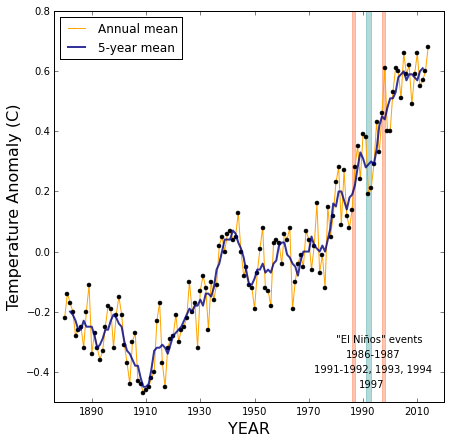

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.plot(data_temp.annual_mean, color='orange', label='Annual mean')
ax.plot(data_temp.annual_mean, 'ko', markersize=4)
ax.plot(data_temp.five_years_mean, color='Navy', label='5-year mean', linewidth=2, alpha=0.8)
ax.legend(loc='best')
ax.set_ylim(-0.5, 0.8)
ax.set_xlim(-4, 140)
ax.set_xlabel('YEAR', fontsize=16)
ax.set_ylabel('Temperature Anomaly (C)', fontsize=16)
ax.set_xticks(range(10, 140, 20))
ax.set_xticklabels(data_temp.index[10::20]) # it must be start with the same value of the previous line
#ax.axhspan(data_temp.Promedio_anual.loc[1997], data_temp.Promedio_anual.loc[1998], alpha=0.5)
ax.axvspan(117, 118, color='OrangeRed', alpha=0.3)
ax.axvspan(106, 107, color='OrangeRed', alpha=0.3)
ax.axvspan(111, 113, color='Teal', alpha=0.3)
ax.annotate('"El Niños" events',xy=(3, 0.2), xytext=(100, -0.3))
ax.annotate('1986-1987', xy=(3, 0.2), xytext=(104, -0.35))
ax.annotate('1991-1992, 1993, 1994', xy=(3, 0.2), xytext=(92, -0.4))
ax.annotate('1997', xy=(3, 0.2), xytext=(109, -0.45))
fig.gca()  # needed for the ipython-inline to display anything
#fig.savefig('temp1.png', dpi=300)
plt.show()

### Find Recent and historical "El Niños"
http://www.pmel.noaa.gov/tao/elnino/el-nino-story.html#recent

search dates in dataframe

In [79]:
#data_temp.loc[1997:1998]

## Global atmosphere CO2 content 
http://climate.nasa.gov/vital-signs/carbon-dioxide/ 

In [37]:
data_co2_year = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_mlo.txt', comment='#', 
                       delim_whitespace=True, header=None, names=['mean', 'unc'],index_col=0)

In [38]:
data_co2_monthly = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', comment='#', 
                       delim_whitespace=True, header=None, names=['month', 'date', 
                       'average', 'interpolated', 'trend', 'days'],index_col=0)

In [ ]:
# #####

## Atmospheric Global CO2 content trend 

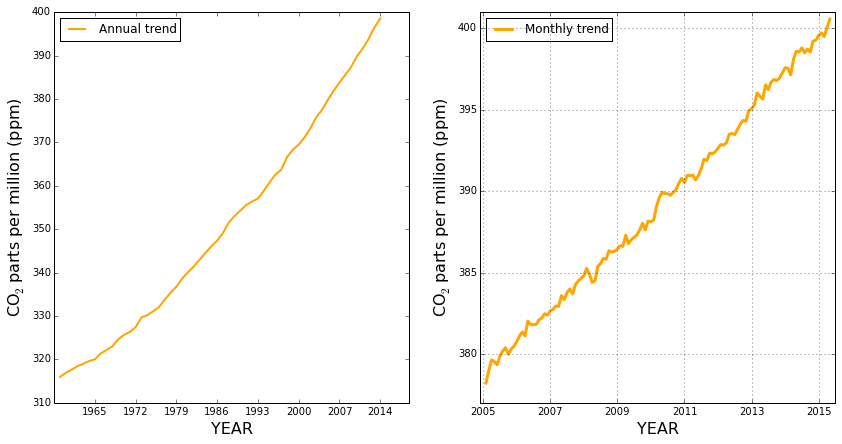

In [39]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(data_co2_year['mean'], color='orange', label='Annual trend', linewidth=2)
ax1.legend(loc='best')
ax1.set_xlabel('YEAR', fontsize=16)
ax1.set_ylabel('CO$_{2}$ parts per million (ppm)', fontsize=16)
ax1.set_xlim(-1, 60)
ax1.set_xticks(range(6, len(data_co2_year['mean']), 7))#
ax1.set_xticklabels(data_co2_year.index[6::7])

ax2.plot(data_co2_monthly.trend[562::], color='orange', label='Monthly trend', linewidth=3) # Plot zoom to 2005
ax2.legend(loc='best')
ax2.set_xlabel('YEAR', fontsize=16)
ax2.set_ylabel('CO$_{2}$ parts per million (ppm)', fontsize=16)
ax2.set_ylim(377, 401)
ax2.set_xlim(-2, 125)
ax2.set_xticks(range(-1, 123 , 24)) # set ticks from 2005 to present
#ax.set_xticks(range(-1, 123, 12 )) # set ticks from 2005 to present
ax2.set_xticklabels(data_co2_monthly.index[562::24])# set tick labels wothd years
ax2.grid()

fig.gca()  # needed for the ipython-inline to display anything
#fig.savefig('co2_trend.png', dpi=300)
plt.show()

## Global Sea level

In [48]:
sea_level = pd.read_csv('http://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt',
                       delim_whitespace=True, skiprows=46, usecols=(2, 11), header=None, names=['yeardec', 'level'])

In [50]:
# split decimal year for getting only the year

year = [] #create empty list

for i in sea_level.yeardec: 
    year.append(str(i).split('.')) #split each decimal year

year = pd.DataFrame(year) # create dataframe with

sea_level.index = year[0] # reindex main dataframe
sea_level['id'] = range(len(sea_level.level)) # crate new column with id

sea_level_group = sea_level.groupby(sea_level.index)# group dataframe by index

In [3]:
### identify the id of El niño event in 1997-1998
# sea_level_group.last()
# sea_level_group.first()

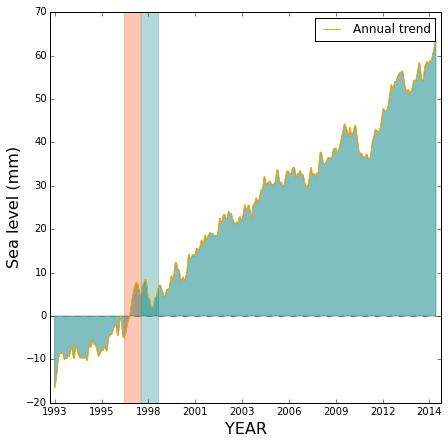

In [51]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.fill_between(range(len(sea_level.level)),0, sea_level.level, 
                color='Teal', label='Annual trend', alpha=0.5)
ax.plot(sea_level.level, color='orange', label='Annual trend')
ax.legend(loc='best')
ax.set_xlabel('YEAR', fontsize=16)
ax.set_ylabel('Sea level (mm)', fontsize=16)
ax.axhline(y=0, color='Gray', linestyle='--')
ax.set_xlim(-9, 825)
ax.set_xticks(range(0, 815, 100))
ax.set_xticklabels(sea_level.index[::100])
ax.axvspan(147, 183, color='OrangeRed', alpha=0.3)
ax.axvspan(184, 220, color='Teal', alpha=0.3)
fig.gca()  # needed for the ipython-inline to display anything
#fig.savefig('co2_trend.png', dpi=300)
plt.show()

## Greenland and Antartic Ice mass

In [22]:
land_ice = pd.read_csv('http://climate.nasa.gov/system/internal_resources/details/original/499_GRN_ANT_mass_changes.csv',
                      skiprows=8, header=True, names=['datedec', 'greenlandGt', 'antarticGt'], index_col=0) 

In [40]:
#land_ice.head(5)

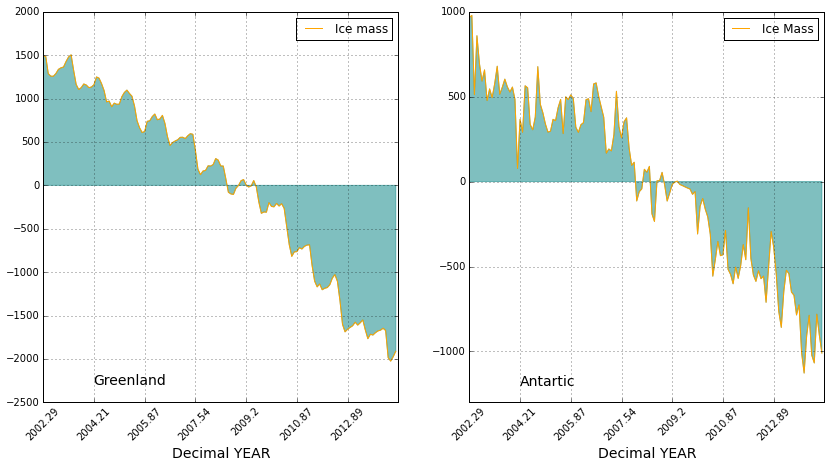

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
                                                    
ax1.fill_between(range(len(land_ice.greenlandGt)),0, land_ice.greenlandGt, 
                color='Teal', label='Ice mass', alpha=0.5)
ax1.plot(land_ice.greenlandGt, color='orange', label='Ice mass')
ax1.legend(loc='best')
ax1.set_xlabel('Decimal YEAR', fontsize=14)
ax1.set_xticklabels(land_ice.index[::20], rotation=45)
ax1.annotate('Greenland', xy=(20, -2300), fontsize=14)
ax2.fill_between(range(len(land_ice.antarticGt)),0, land_ice.antarticGt, 
                color='Teal', label='Ice mass', alpha=0.5)
ax2.plot(land_ice.antarticGt, color='orange', label='Ice Mass')
ax2.legend(loc='best')
ax2.set_xlabel('Decimal YEAR', fontsize=14)
ax2.set_ylim(-1300, 1000)
ax2.set_xticklabels(land_ice.index[::20], rotation=45)
ax2.annotate('Antartic', xy=(20, -1200), fontsize=14)
ax2.grid()
ax1.grid()
fig.gca()
plt.show()

In [32]:
??ax2.annotate